In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPClassifier 
%matplotlib inline 

We are using load_digits function instead of any database. We used return_X_y = True, parameter, through which we get two dicts data and target. Further we will convert them to Dataframe and series. 

In [2]:
data, target = load_digits(return_X_y=True)

In [3]:
features = pd.DataFrame(data)
target = pd.Series(target)

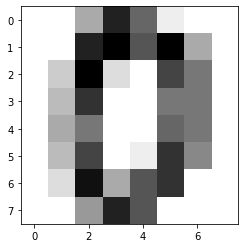

In [4]:
first_image = features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

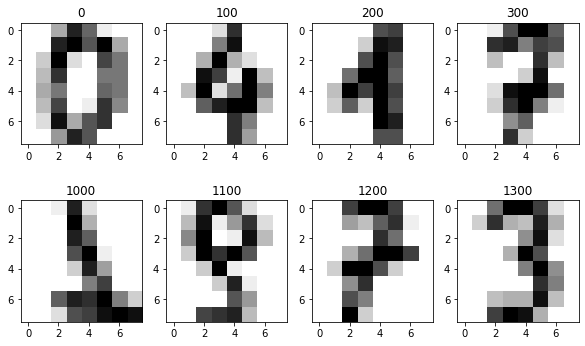

In [5]:
l = [0,100,200,300,1000,1100,1200,1300]
n = 1
fig = plt.figure(figsize=(10,6))
for index in l:
    plt.subplot(2,4,n)
    image = features.iloc[index]
    image = image.values
    image = image.reshape(8,8)
    plt.imshow(image,cmap='gray_r') 
    plt.title(index)
    n = n+1

In [6]:
cutoff = int(len(features)*0.8)
train_f = features.iloc[:cutoff]
train_l = target.iloc[:cutoff]
test_f = features.iloc[cutoff:]
test_l = target.iloc[cutoff:]

def train(train_f,train_l,n):
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(train_f,train_l)
    return kn

def test(kn, test_f,test_l):
    p = kn.predict(test_f)
    a = accuracy_score(test_l,p)
    return a

kn = train(train_f,train_l,1)
score = test(kn, test_f,test_l)
print(score)

0.9555555555555556


In [7]:
def cross_validate(k,n):
    kf = KFold(n_splits=k,shuffle=True, random_state=1)
    test_accuracies = []
    train_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, train_labels = features.iloc[train_index], target[train_index]
        test_features, test_labels = features.iloc[test_index], target[test_index]
        
        kn = train(train_features,train_labels,n)
        test_accuracy = test(kn,test_features,test_labels)
        train_accuracy = test(kn,train_features,train_labels) 
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)
    return [np.mean(test_accuracies), np.mean(train_accuracies)]

As per above code I have designed cross_validate function that is capable of calucalating accuracy of test set and train set. We can check accuracies by changing different parameters such as number of cross folds and number of nearest neighbors. Below I will try to find at which value of 'k' and 'n' accuracies are highest.  

Text(0, 0.5, 'Accuracies')

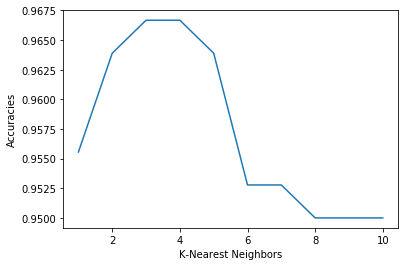

In [8]:
y1 = []
for n in range(1,11):
    kn = train(train_f,train_l,n)
    score = test(kn,test_f,test_l)
    y1.append(score)
    
plt.plot(range(1,11),y1)
plt.xlabel('K-Nearest Neighbors')
plt.ylabel('Accuracies')

As from the above graph it is clear that maximum accuracy occurs when nearest neighbors were equal to 4.

In [9]:
y2 = []
y3 = []
for k in range(2,15):
    y2.append(cross_validate(k,4)[0])
    y3.append(cross_validate(k,4)[1])

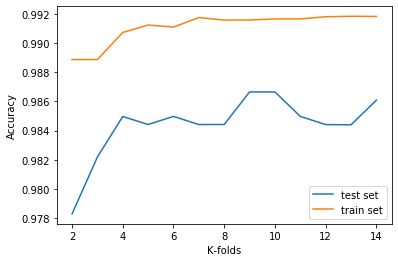

In [10]:
plt.plot(range(2,15),y2,label='test set')
plt.plot(range(2,15),y3,label='train set')
plt.xlabel('K-folds')
plt.ylabel('Accuracy')
plt.legend()
plt.ticklabel_format(useOffset=False)

As per the above graph we see that, accuracy for the train set remains almost constant, but whereas for the test set, it gives best result when k = 10. Now we have seen K-Nearest algorithm, we will focus on using MLPClassifier method, by varying the number of neurons in the hidden layers.

Same as we did before, we will use train(), test() and cross_validate() functions to apply MPLClassifier(). 

In [11]:
def train(train_f,train_l,n,activate):
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation=activate, max_iter=1000)
    mlp.fit(train_f,train_l)
    return mlp

def test(mlp,test_f,test_l):
    p = mlp.predict(test_f)
    a = accuracy_score(test_l,p)
    return a

def cross_validate(k,n,activate):
    kf = KFold(n_splits=k,shuffle=True, random_state=2)
    test_accuracies = []
    train_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, train_labels = features.iloc[train_index], target[train_index]
        test_features, test_labels = features.iloc[test_index], target[test_index]
        
        mlp = train(train_features,train_labels,n,activate)
        test_accuracy = test(mlp,test_features,test_labels)
        train_accuracy = test(mlp,train_features,train_labels) 
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)
    return [np.mean(test_accuracies), np.mean(train_accuracies)]



In [12]:
l1 = []
l2 = []
neurons = [8,16,32,64,128,256]
for n in neurons:
    l1.append(cross_validate(4,n,'relu')[0])
    l2.append(cross_validate(4,n,'relu')[1])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
print(l1)
print(l2)

[0.9309910913140311, 0.9543714427121999, 0.96606285572878, 0.9699566938876515, 0.9705134867607028, 0.9771937639198218]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


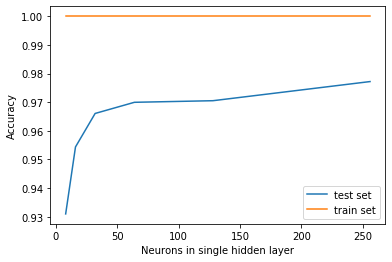

In [14]:
plt.plot(neurons,l1,label='test set')
plt.plot(neurons,l2,label='train set')
plt.xlabel('Neurons in single hidden layer')
plt.ylabel('Accuracy')
plt.legend()
plt.ticklabel_format(useOffset=False)

It is clear from above graph, for the test set, as the number of neurons increased from 100, the accuracy score becomes constant. Also as the neurons increased from 32, the model performs quite well in training sets, but does'nt do much well in test sets. Hence, this model shows overfitting. 

Now we are going to increase the hidden layers from one to two, 64 neurons in each layer. And we will check how it performed as compared to other models. 

In [15]:
def train(train_f,train_l,m,n,activate):
    mlp = MLPClassifier(hidden_layer_sizes=(m,n), activation=activate, max_iter=1000)
    mlp.fit(train_f,train_l)
    return mlp

def test(mlp,test_f,test_l):
    p = mlp.predict(test_f)
    a = accuracy_score(test_l,p)
    return a

def cross_validate(k,m,n,activate):
    kf = KFold(n_splits=k,shuffle=True, random_state=2)
    test_accuracies = []
    train_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, train_labels = features.iloc[train_index], target[train_index]
        test_features, test_labels = features.iloc[test_index], target[test_index]
        
        mlp = train(train_features,train_labels,m,n,activate)
        test_accuracy = test(mlp,test_features,test_labels)
        train_accuracy = test(mlp,train_features,train_labels) 
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)
    return [np.mean(test_accuracies), np.mean(train_accuracies)]

Lets manipulate, cross fold number from 2 to 9, with two hidden layers fixed 64 each. 

In [16]:
a1 = []
a2 = []
for i in range(2,10):
    a1.append(cross_validate(i,64,64,'relu')[0])
    a2.append(cross_validate(i,64,64,'relu')[1])

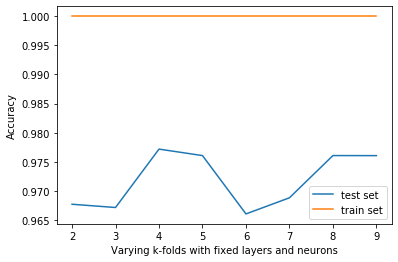

In [17]:
plt.plot(range(2,10),a1,label='test set')
plt.plot(range(2,10),a2,label='train set')
plt.xlabel('Varying k-folds with fixed layers and neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.ticklabel_format(useOffset=False)

In [18]:
def train(train_f,train_l,m,n,o,activate):
    mlp = MLPClassifier(hidden_layer_sizes=(m,n,o), activation=activate, max_iter=1000)
    mlp.fit(train_f,train_l)
    return mlp

def test(mlp,test_f,test_l):
    p = mlp.predict(test_f)
    a = accuracy_score(test_l,p)
    return a

def cross_validate(k,m,n,o,activate):
    kf = KFold(n_splits=k,shuffle=True, random_state=2)
    test_accuracies = []
    train_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, train_labels = features.iloc[train_index], target[train_index]
        test_features, test_labels = features.iloc[test_index], target[test_index]
        
        mlp = train(train_features,train_labels,m,n,o,activate)
        test_accuracy = test(mlp,test_features,test_labels)
        train_accuracy = test(mlp,train_features,train_labels) 
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)
    return [np.mean(test_accuracies), np.mean(train_accuracies)]

Text(0, 0.5, 'accuracy')

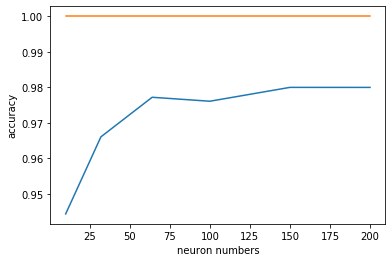

In [19]:
neo = [10,32,64,100,150,200]
l = []
for n in neo:
    l.append(cross_validate(6,n,n,n,'relu'))

plt.plot(neo,l)
plt.xlabel('neuron numbers')
plt.ylabel('accuracy')